<a href="https://colab.research.google.com/github/williamervin7/Sales-Insights-from-Online-Retail-Data/blob/main/sales_insights_from_online_retail_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/online-retail-customer-clustering")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/online-retail-customer-clustering


In [ ]:
import pandas as pd
import os

# The 'path' variable from the previous cell points to the directory
# Find the actual CSV file within this directory
csv_file_path = None
for root, _, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            csv_file_path = os.path.join(root, file)
            break
    if csv_file_path:
        break

if csv_file_path:
    ecom = pd.read_csv(csv_file_path, encoding='ISO-8859-1')
    print("Dataset loaded successfully!")
else:
    print("No CSV file found in the downloaded directory.")

Dataset loaded successfully!


## Introduction
This project explores transactional data from an online retail store. The goal is to uncover patterns in product sales, customer spending, and order behavior using data cleaning, feature engineering, exploratory data analysis (EDA), and basic statistical insights.

This dataset is often used to simulate real-world ecommerce challenges such as identifying best-selling products, understanding customer value, and detecting outliers in purchase behavior.

## Clean the data

In [ ]:
ecom_copy = ecom.copy()
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
ecom.isna().any()


,0
InvoiceNo,False
StockCode,False
Description,True
Quantity,False
InvoiceDate,False
UnitPrice,False
CustomerID,True
Country,False


Remove rows with missing values in the CustomerID column

In [ ]:
print("Before:", len(ecom))
ecom.dropna(subset=['CustomerID'], inplace=True)
print("After:", len(ecom))

Before: 541909
After: 406829


Filter out rows with non-positive UnitPrice and display the count before and after the filter.

In [ ]:
print("Before:", len(ecom))
ecom = ecom[ecom['UnitPrice'] > 0]
print("After:", len(ecom))

Before: 406829
After: 406789


Let's do the same for the Quantiy

In [ ]:
print("Before:", len(ecom))
ecom = ecom[ecom['Quantity'] > 0]
print("After:", len(ecom))

Before: 406789
After: 397884


## Distribution & Probability
Calculate the 'TotalPrice' by multiplying 'Quantity' with 'UnitPrice', create a copy of the dataframe, and display the first 10 rows

In [ ]:
ecom['TotalPrice'] = ecom['Quantity'] * ecom['UnitPrice']
ecom_copy = ecom.copy()
ecom.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom,54.08


In [ ]:
print(ecom['TotalPrice'].max())
print(ecom['TotalPrice'].min())

168469.6
0.001


### Filtering and Visualizing the Top 80% of Sales

This code filters the e-commerce dataset based on total price, focusing on the lower 80% of prices, and visualizes it through a histogram.

- **Filtering the Data**:
    - The 80th percentile price (`filter_price`) is determined using the `np.percentile()` function from `numpy`, which returns the value at the given percentile (80th in this case).
  - The dataset is then filtered to include only the transactions where the `TotalPrice` is less than or equal to the 80th percentile value.

- **Plotting the Histogram**:
  - A histogram is generated using `matplotlib` to visualize the distribution of `TotalPrice` in the filtered dataset.
  - The chart is set to display 50 bins, with the bars colored skyblue and black edges for better visibility.
  - The title and labels are added for clarity: "Histogram of Total Price (Filtered by 80th Percentile)" for the title, and "Total Price" and "Frequency" for the x-axis and y-axis labels, respectively.

This visualization provides insights into the distribution of total prices, focusing on the lower 80% of transactions.


Text(0, 0.5, 'Frequency')

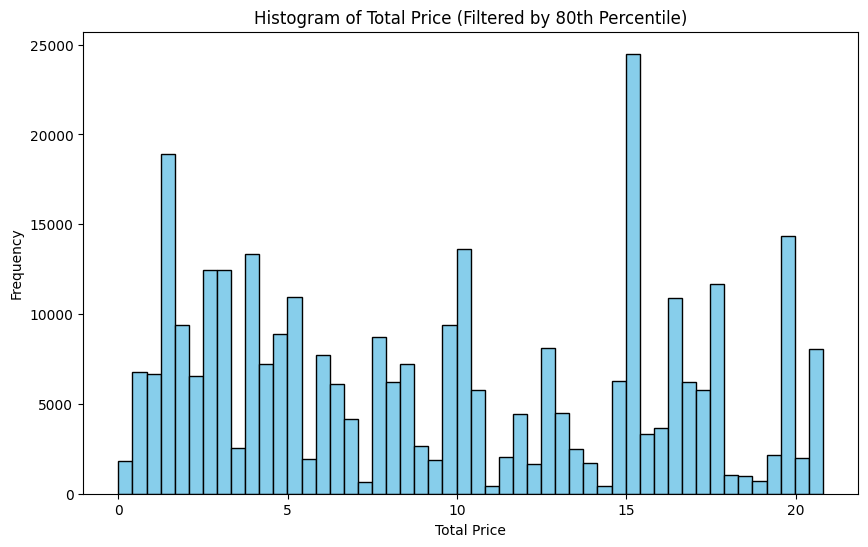

In [ ]:
import numpy as np
filter_price = np.percentile(ecom['TotalPrice'], 80)
ecom_filter = ecom[ecom['TotalPrice'] <= filter_price]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(ecom_filter['TotalPrice'], bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Price (Filtered by 80th Percentile)")
plt.xlabel("Total Price")
plt.ylabel("Frequency")

# What percentage of orders are below a certain value £50?

In [ ]:
percent = (ecom['TotalPrice']<50).mean()
print(f"{percent:.2%} of the orders are below £50")

93.16% of the orders are below £50


##  Business Insights
**Which products are most frequently ordered?**

Calculate the total quantity sold for each product, sort them in descending order, and display the top 10 products

In [ ]:
top_10_quantity = ecom.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_10_quantity)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


**Amout sold from the top 10**

Filter the top 10 products by quantity, then calculate and display the total revenue for each of these products, sorted in descending order.

In [ ]:
top_10_products = top_10_quantity.index
top_10_revenue = ecom[ecom["Description"].isin(top_10_products)]
top_10_revenue.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

,TotalPrice
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
ASSORTED COLOUR BIRD ORNAMENT,56580.34
RABBIT NIGHT LIGHT,51346.20
POPCORN HOLDER,23427.71
PACK OF 72 RETROSPOT CAKE CASES,16394.53
MINI PAINT SET VINTAGE,16039.24


### Top 10 Products: Quantity vs Revenue

This code creates a side-by-side bar chart to compare the top 10 products based on both quantity sold and total revenue.

- **Sorting the Data**:
  - The `top_10_quantity` and `top_10_revenue` Series are sorted in descending order to ensure the same products are displayed for both metrics.
  
- **Plotting Setup**:
  - The x-axis positions for the bars are defined using `np.arange`, and the width of the bars is set to 0.4.
  
- **Plot Creation**:
  - A bar chart is generated with two bars for each product: one for the quantity sold (in skyblue) and one for total revenue (in orange).
  
- **Axis and Labels**:
  - The y-axis is labeled as "Count / Revenue (£)", and the chart is titled "Top 10 Products: Quantity vs Revenue."
  - The x-axis ticks correspond to the product names (rotated 45 degrees for readability).
  - A legend is added to distinguish between quantity sold and total revenue.

- **Layout Adjustment**:
  - The layout is adjusted for a neat display of labels and bars.

This visualization helps compare the top 10 products in terms of both the number of units sold and the total revenue they generated.


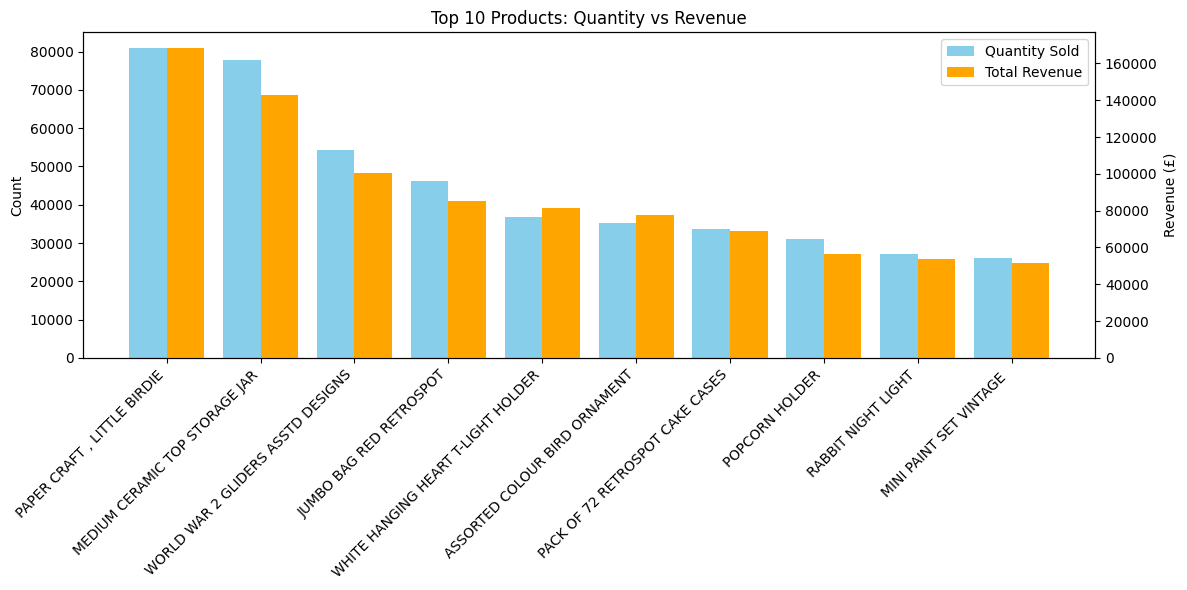

In [ ]:
#make top_10_revenue into a series
top_10_revenue = ecom.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
import numpy as np

# Sort the Series to make sure they have the same top 10 products
top_10_quantity_sorted = top_10_quantity.head(10).sort_values(ascending=False)
top_10_revenue_sorted = top_10_revenue.head(10).sort_values(ascending=False)

# Set up positions for the bars
x = np.arange(len(top_10_quantity_sorted))  # Product locations on the x-axis
width = 0.4  # Width of the bars

# Plotting both bars side by side
fig, ax = plt.subplots(figsize=(12,6))

# Plot Quantity Sold
ax.bar(x - width/2, top_10_quantity_sorted.values, width, label='Quantity Sold', color='skyblue')
# Create a second y-axis and plot Revenue
ax2 = ax.twinx()

# Plot Total Revenue
ax2.bar(x + width/2, top_10_revenue_sorted.values, width, label='Total Revenue', color='orange')



# Add labels, title, and legend
ax.set_ylabel('Count')
ax2.set_ylabel('Revenue (£)')
ax.set_title('Top 10 Products: Quantity vs Revenue')
ax.set_xticks(x)
ax.set_xticklabels(top_10_quantity_sorted.index, rotation=45, ha='right')

# Get legend handles and labels from both axes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine and show the legend on ax
ax.legend(handles1 + handles2, labels1 + labels2, loc='upper right')


# Show the plot
plt.tight_layout()
plt.show()


**Do certain customers spend significantly more than others?**

In [ ]:
top_sales = ecom.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_sales)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: TotalPrice, dtype: float64


**What percantage of sales came from the top 10 customers**

Calculate the percentage of total sales contributed by the top 10 customers and display it alongside the total number of unique customers in the dataset.

In [ ]:
total_top_sales = top_sales.sum()
percentage = total_top_sales / ecom['TotalPrice'].sum()
total_customers = ecom['CustomerID'].nunique()
print(f"{percentage * 100:.2f}% of total sales came from the top 10 customers. With a total of {total_customers} customers")

17.26% of total sales came from the top 10 customers. With a total of 4338 customers


In [ ]:
cumulative_sales_pct = (
    ecom.groupby('CustomerID')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .cumsum() / ecom['TotalPrice'].sum()
)

### Cumulative Revenue by Customer Rank

This code generates a cumulative line chart to visualize the percentage of total revenue contributed by customers, ranked by their sales.

- **Figure Setup**: The figure is set to a size of 10x6 inches.
  
- **Plotting Cumulative Revenue**: The cumulative revenue percentage is plotted using a line with markers. This shows how revenue accumulates as you move down the list of customers sorted by revenue.
  
- **Axis Labels**: The chart is labeled with a title, and the x-axis and y-axis are marked to indicate customer rank and cumulative revenue percentage, respectively.

- **Grid**: A grid is added for easier value reading.

- **Percentage Format**: The y-axis is formatted to display values as percentages.

- **80% Revenue Indicator**: A red dashed vertical line is drawn at the point where 80% of total revenue is reached, along with a text label showing how many customers contribute to that revenue.

- **Layout Adjustment**: The layout is adjusted to prevent overlap of labels and title.

- **Display**: Finally, the plot is displayed to visualize the distribution of revenue among customers.

This plot helps identify the few high-revenue customers that contribute the majority of the sales.


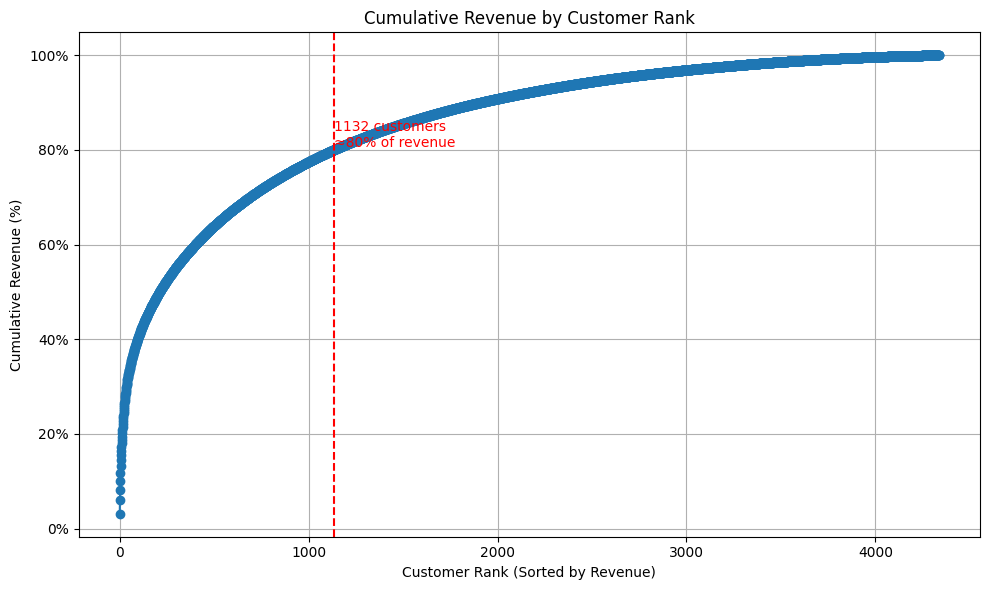

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(cumulative_sales_pct.values, marker='o', linestyle='-')
plt.title('Cumulative Revenue by Customer Rank')
plt.xlabel('Customer Rank (Sorted by Revenue)')
plt.ylabel('Cumulative Revenue (%)')
plt.grid(True)

# Format y-axis to percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Optional: Add a vertical line to show where 80% of sales come from
eighty_percent_index = (cumulative_sales_pct < 0.8).sum()
plt.axvline(eighty_percent_index, color='red', linestyle='--')
plt.text(eighty_percent_index, 0.8, f'{eighty_percent_index} customers\n≈80% of revenue',
         color='red', ha='left', va='bottom')

plt.tight_layout()
plt.show()


## Time-Based Analysis

To ensure the InvoiceDate column is recognized as a date, we used the pd.to_datetime() function to convert the column into a proper DateTime format. This allows for easier manipulation and analysis of the data based on dates, such as filtering or resampling.

In [ ]:
ecom['InvoiceDate'] = pd.to_datetime(ecom['InvoiceDate'], format="mixed")

Filter the dataset to include only sales from October and November 2011, then identify the top 10 products based on total revenue within that time frame.

In [ ]:
pop_month = ecom[(ecom['InvoiceDate'] >= '2011-10-01') & (ecom['InvoiceDate'] <= '2011-11-30')]
pop_month = pop_month.groupby("Description")['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(pop_month)

Description
PICNIC BASKET WICKER 60 PIECES        39619.50
RABBIT NIGHT LIGHT                    28402.62
Manual                                26720.50
WHITE HANGING HEART T-LIGHT HOLDER    23491.43
REGENCY CAKESTAND 3 TIER              21424.68
PAPER CHAIN KIT 50'S CHRISTMAS        16624.48
POSTAGE                               15554.90
JUMBO BAG RED RETROSPOT               14373.39
CHILLI LIGHTS                         13656.47
ASSORTED COLOUR BIRD ORNAMENT         12267.49
Name: TotalPrice, dtype: float64


<Axes: title={'center': 'Top 10 Products by Sales in Oct-Nov 2011'}, xlabel='Description'>

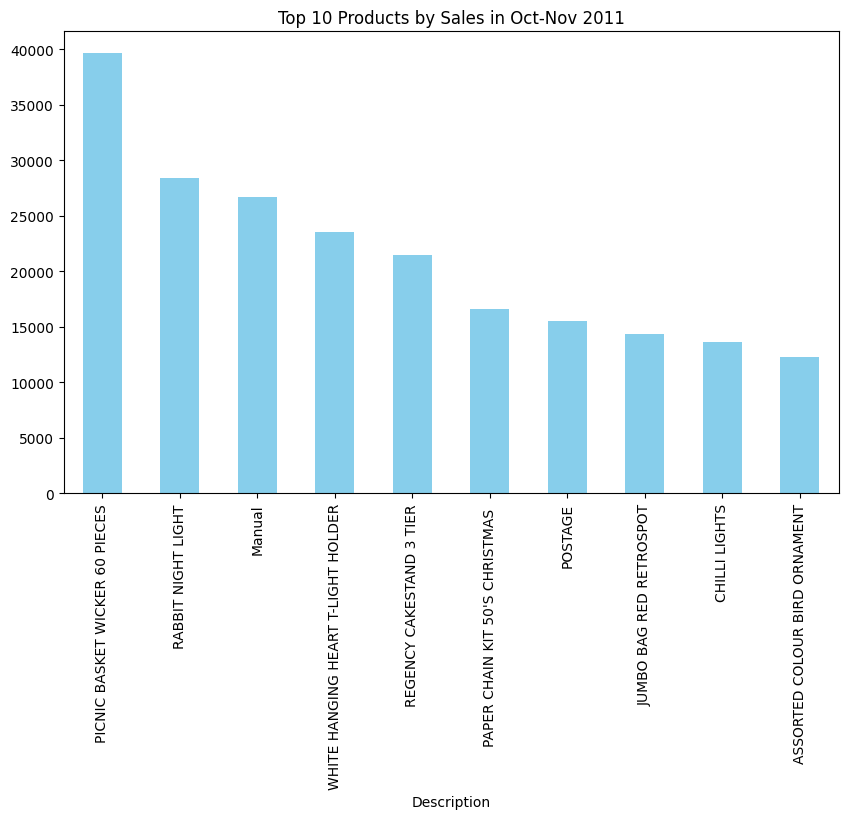

In [ ]:
pop_month.plot(kind="bar", figsize=(10, 6), color='skyblue', title='Top 10 Products by Sales in Oct-Nov 2011')


Set InvoiceDate as the index to enable time-based operations. Then, resample the data by month-end ('ME') to calculate total monthly sales. Finally, plot the results to visualize sales trends over time.

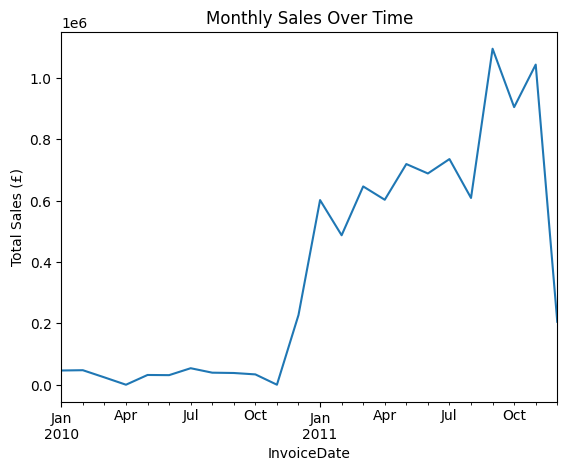

In [ ]:
ecom.set_index('InvoiceDate', inplace=True)

monthly_sales = ecom.resample('ME')['TotalPrice'].sum()
monthly_sales.plot(title='Monthly Sales Over Time')
plt.ylabel('Total Sales (£)')
plt.show()